# Práctica 1 #

Miembros del grupo de prácticas:
- Pavlo Rudak
- Sara Isabel Maza Celdrán
- Guillermo Moro Orozco

## Imports ##

In [1]:
import os
import math
import numpy as np; print(f'Numpy version: {np.__version__}')
import pandas as pd; print(f'Pandas version: {pd.__version__}')
import matplotlib as mpl; print(f'MatPlotLib version: {mpl.__version__}')
import sklearn as sk; print(f'Scikit-Learn version: {sk.__version__}')
import tqdm as tq
import matplotlib as mpl; print(f'MatPlotLib version: {mpl.__version__}')

# Imports functions
from pathlib import Path
from math import ceil
from numpy import abs, logical_and, nan
from pandas import read_csv, DataFrame, get_dummies
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

#ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression



Numpy version: 1.23.5
Pandas version: 2.0.3
MatPlotLib version: 3.7.2


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Scikit-Learn version: 1.2.2
MatPlotLib version: 3.7.2


## Data ##

### Read dataset ###

In [2]:
student_mat = "/kaggle/input/student-mat/student-mat.csv"

#Read a dataset
data = pd.read_csv(student_mat, sep =';', decimal='.')

#Print dataset info
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

categorical_variables.value_counts().plot.pie(subplots=True, layout=(ceil(len(categorical_variables.columns)/1), 1), sharex=False, sharey=False)

print()### Exploratory Data Analysis (EDA) ###

### Exploratory Data Analysis (EDA) ###


In [3]:
# Pre-process the data
data['school'] = data['school'].astype('category')
data['sex'] = data['sex'].astype('category')
data['address'] = data['address'].astype('category')
data['famsize'] = data['famsize'].astype('category')
data['Pstatus'] = data['Pstatus'].astype('category')
data['Mjob'] = data['Mjob'].astype('category')
data['Fjob'] = data['Fjob'].astype('category')
data['reason'] = data['reason'].astype('category')
data['guardian'] = data['guardian'].astype('category')
data['schoolsup'] = data['schoolsup'].astype('category')
data['famsup'] = data['famsup'].astype('category')
data['paid'] = data['paid'].astype('category')
data['activities'] = data['activities'].astype('category')
data['nursery'] = data['nursery'].astype('category')
data['higher'] = data['higher'].astype('category')
data['internet'] = data['internet'].astype('category')
data['romantic'] = data['romantic'].astype('category')

# Print dataset information

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   school      395 non-null    category
 1   sex         395 non-null    category
 2   age         395 non-null    int64   
 3   address     395 non-null    category
 4   famsize     395 non-null    category
 5   Pstatus     395 non-null    category
 6   Medu        395 non-null    int64   
 7   Fedu        395 non-null    int64   
 8   Mjob        395 non-null    category
 9   Fjob        395 non-null    category
 10  reason      395 non-null    category
 11  guardian    395 non-null    category
 12  traveltime  395 non-null    int64   
 13  studytime   395 non-null    int64   
 14  failures    395 non-null    int64   
 15  schoolsup   395 non-null    category
 16  famsup      395 non-null    category
 17  paid        395 non-null    category
 18  activities  395 non-null    category
 19  nursery 

## Categorical variables ##

In [4]:
categorical_variables = data.select_dtypes(include='category')
print(categorical_variables)
print(categorical_variables.shape)

    school sex address famsize Pstatus      Mjob      Fjob  reason guardian  \
0       GP   F       U     GT3       A   at_home   teacher  course   mother   
1       GP   F       U     GT3       T   at_home     other  course   father   
2       GP   F       U     LE3       T   at_home     other   other   mother   
3       GP   F       U     GT3       T    health  services    home   mother   
4       GP   F       U     GT3       T     other     other    home   father   
..     ...  ..     ...     ...     ...       ...       ...     ...      ...   
390     MS   M       U     LE3       A  services  services  course    other   
391     MS   M       U     LE3       T  services  services  course   mother   
392     MS   M       R     GT3       T     other     other  course    other   
393     MS   M       R     LE3       T  services     other  course   mother   
394     MS   M       U     LE3       T     other   at_home  course   father   

    schoolsup famsup paid activities nursery higher

In [5]:
print(categorical_variables.describe().T)

print()

           count unique     top freq
school       395      2      GP  349
sex          395      2       F  208
address      395      2       U  307
famsize      395      2     GT3  281
Pstatus      395      2       T  354
Mjob         395      5   other  141
Fjob         395      5   other  217
reason       395      4  course  145
guardian     395      3  mother  273
schoolsup    395      2      no  344
famsup       395      2     yes  242
paid         395      2      no  214
activities   395      2     yes  201
nursery      395      2     yes  314
higher       395      2     yes  375
internet     395      2     yes  329
romantic     395      2      no  263



**List of categorical columns**


In [6]:
# List of categorical columns
categorical_columns = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

## Bar Plot ##

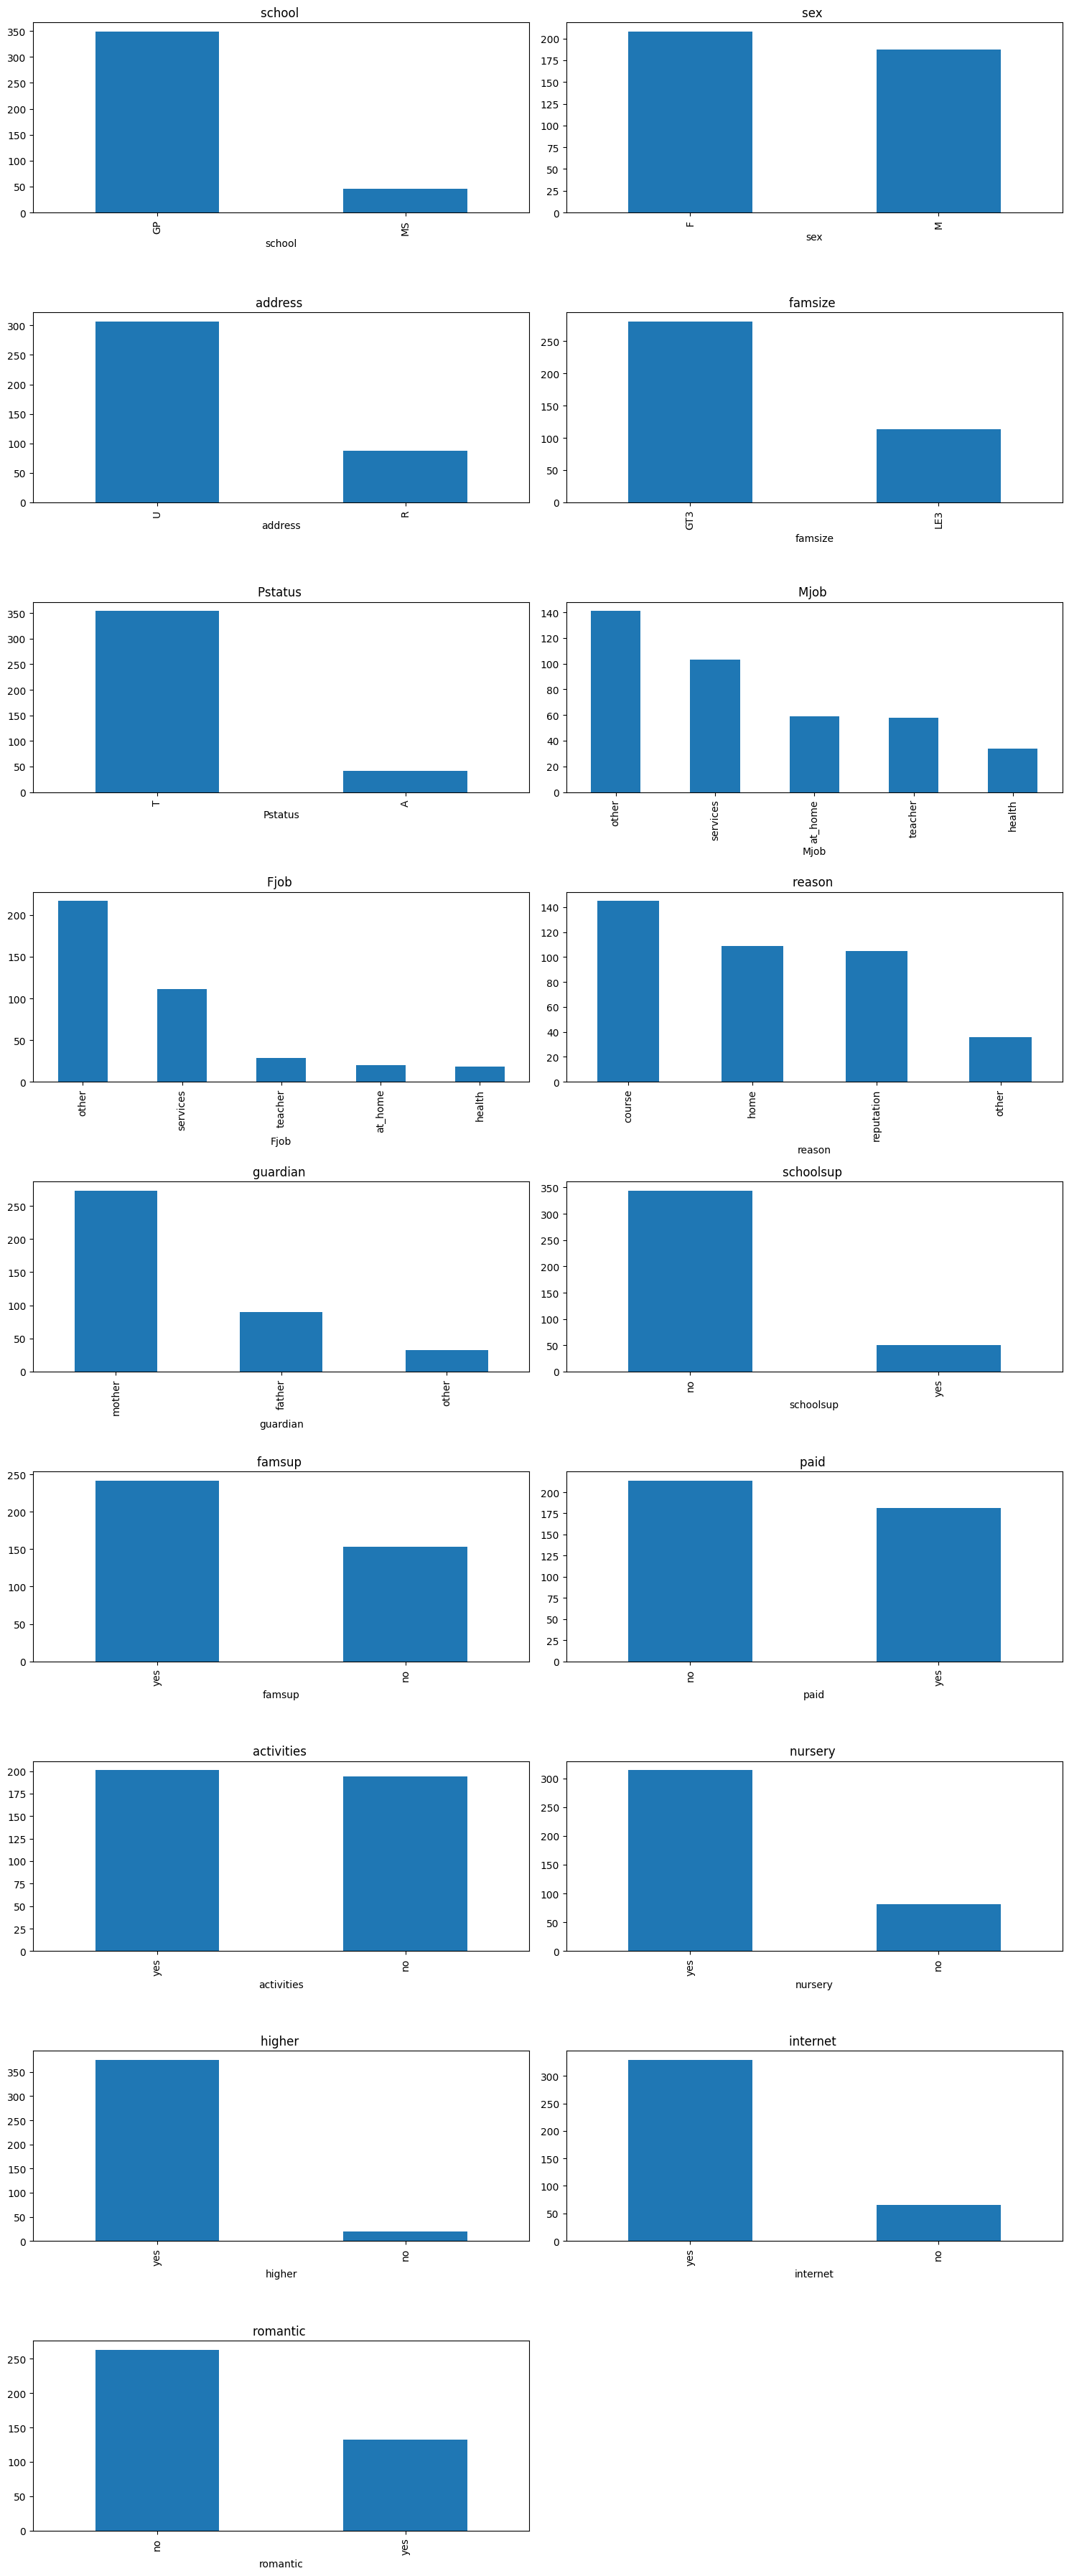

In [7]:

# Plot bar plots for each categorical variable
num_cols = len(categorical_columns)
num_rows = (num_cols + 1) // 2  # Calculate the number of rows for subplots

fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows * 4))  # Create subplots

for i, col in enumerate(categorical_columns):
    row = i // 2
    col_num = i % 2
    categorical_variables[col].value_counts().plot(kind='bar', ax=axes[row, col_num])
    axes[row, col_num].set_title(f'{col} ')

# Hide any empty subplots
for i in range(len(categorical_columns), num_rows * 2):
    row = i // 2
    col_num = i % 2
    fig.delaxes(axes[row, col_num])

plt.tight_layout()
plt.show()


## Pie Plot ##

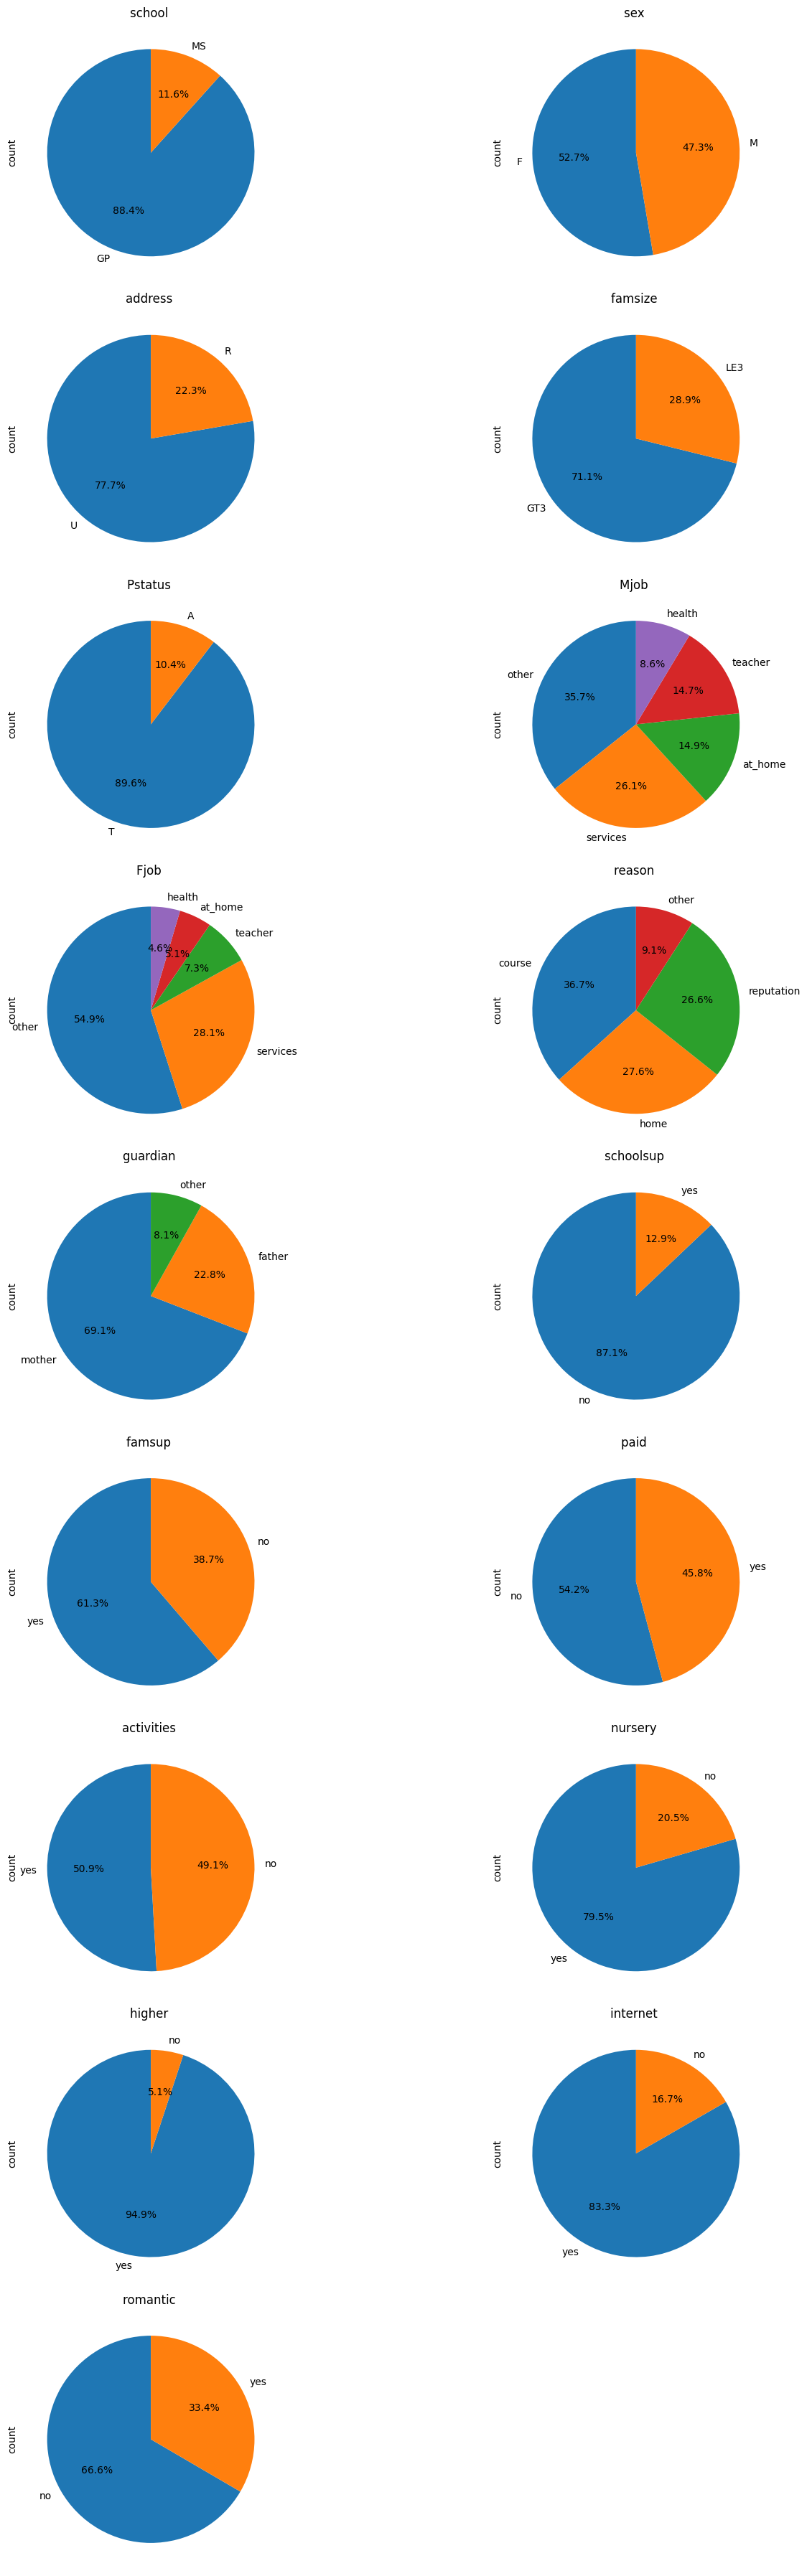

In [8]:


# Plot pie charts for each categorical variable
num_cols = len(categorical_columns)
num_rows = (num_cols + 1) // 2  # Calculate the number of rows for subplots

fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows * 4))  # Create subplots

for i, col in enumerate(categorical_columns):
    row = i // 2
    col_num = i % 2
    categorical_variables[col].value_counts().plot.pie(ax=axes[row, col_num], autopct='%1.1f%%', startangle=90)
    axes[row, col_num].set_title(f'{col} ')

# Hide any empty subplots
for i in range(len(categorical_columns), num_rows * 2):
    row = i // 2
    col_num = i % 2
    fig.delaxes(axes[row, col_num])

plt.tight_layout()
plt.show()

## Numerical variables ##

In [9]:
int64_variables = data.select_dtypes(include='int64')
print(int64_variables)
print(int64_variables.shape)

     age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  \
0     18     4     4           2          2         0       4         3   
1     17     1     1           1          2         0       5         3   
2     15     1     1           1          2         3       4         3   
3     15     4     2           1          3         0       3         2   
4     16     3     3           1          2         0       4         3   
..   ...   ...   ...         ...        ...       ...     ...       ...   
390   20     2     2           1          2         2       5         5   
391   17     3     1           2          1         0       2         4   
392   21     1     1           1          1         3       5         5   
393   18     3     2           3          1         0       4         4   
394   19     1     1           1          1         0       3         2   

     goout  Dalc  Walc  health  absences  G1  G2  G3  
0        4     1     1       3         6   5

**List of numerical columns**

In [10]:
# List of numerical columns
numerical_columns = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime',
                     'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

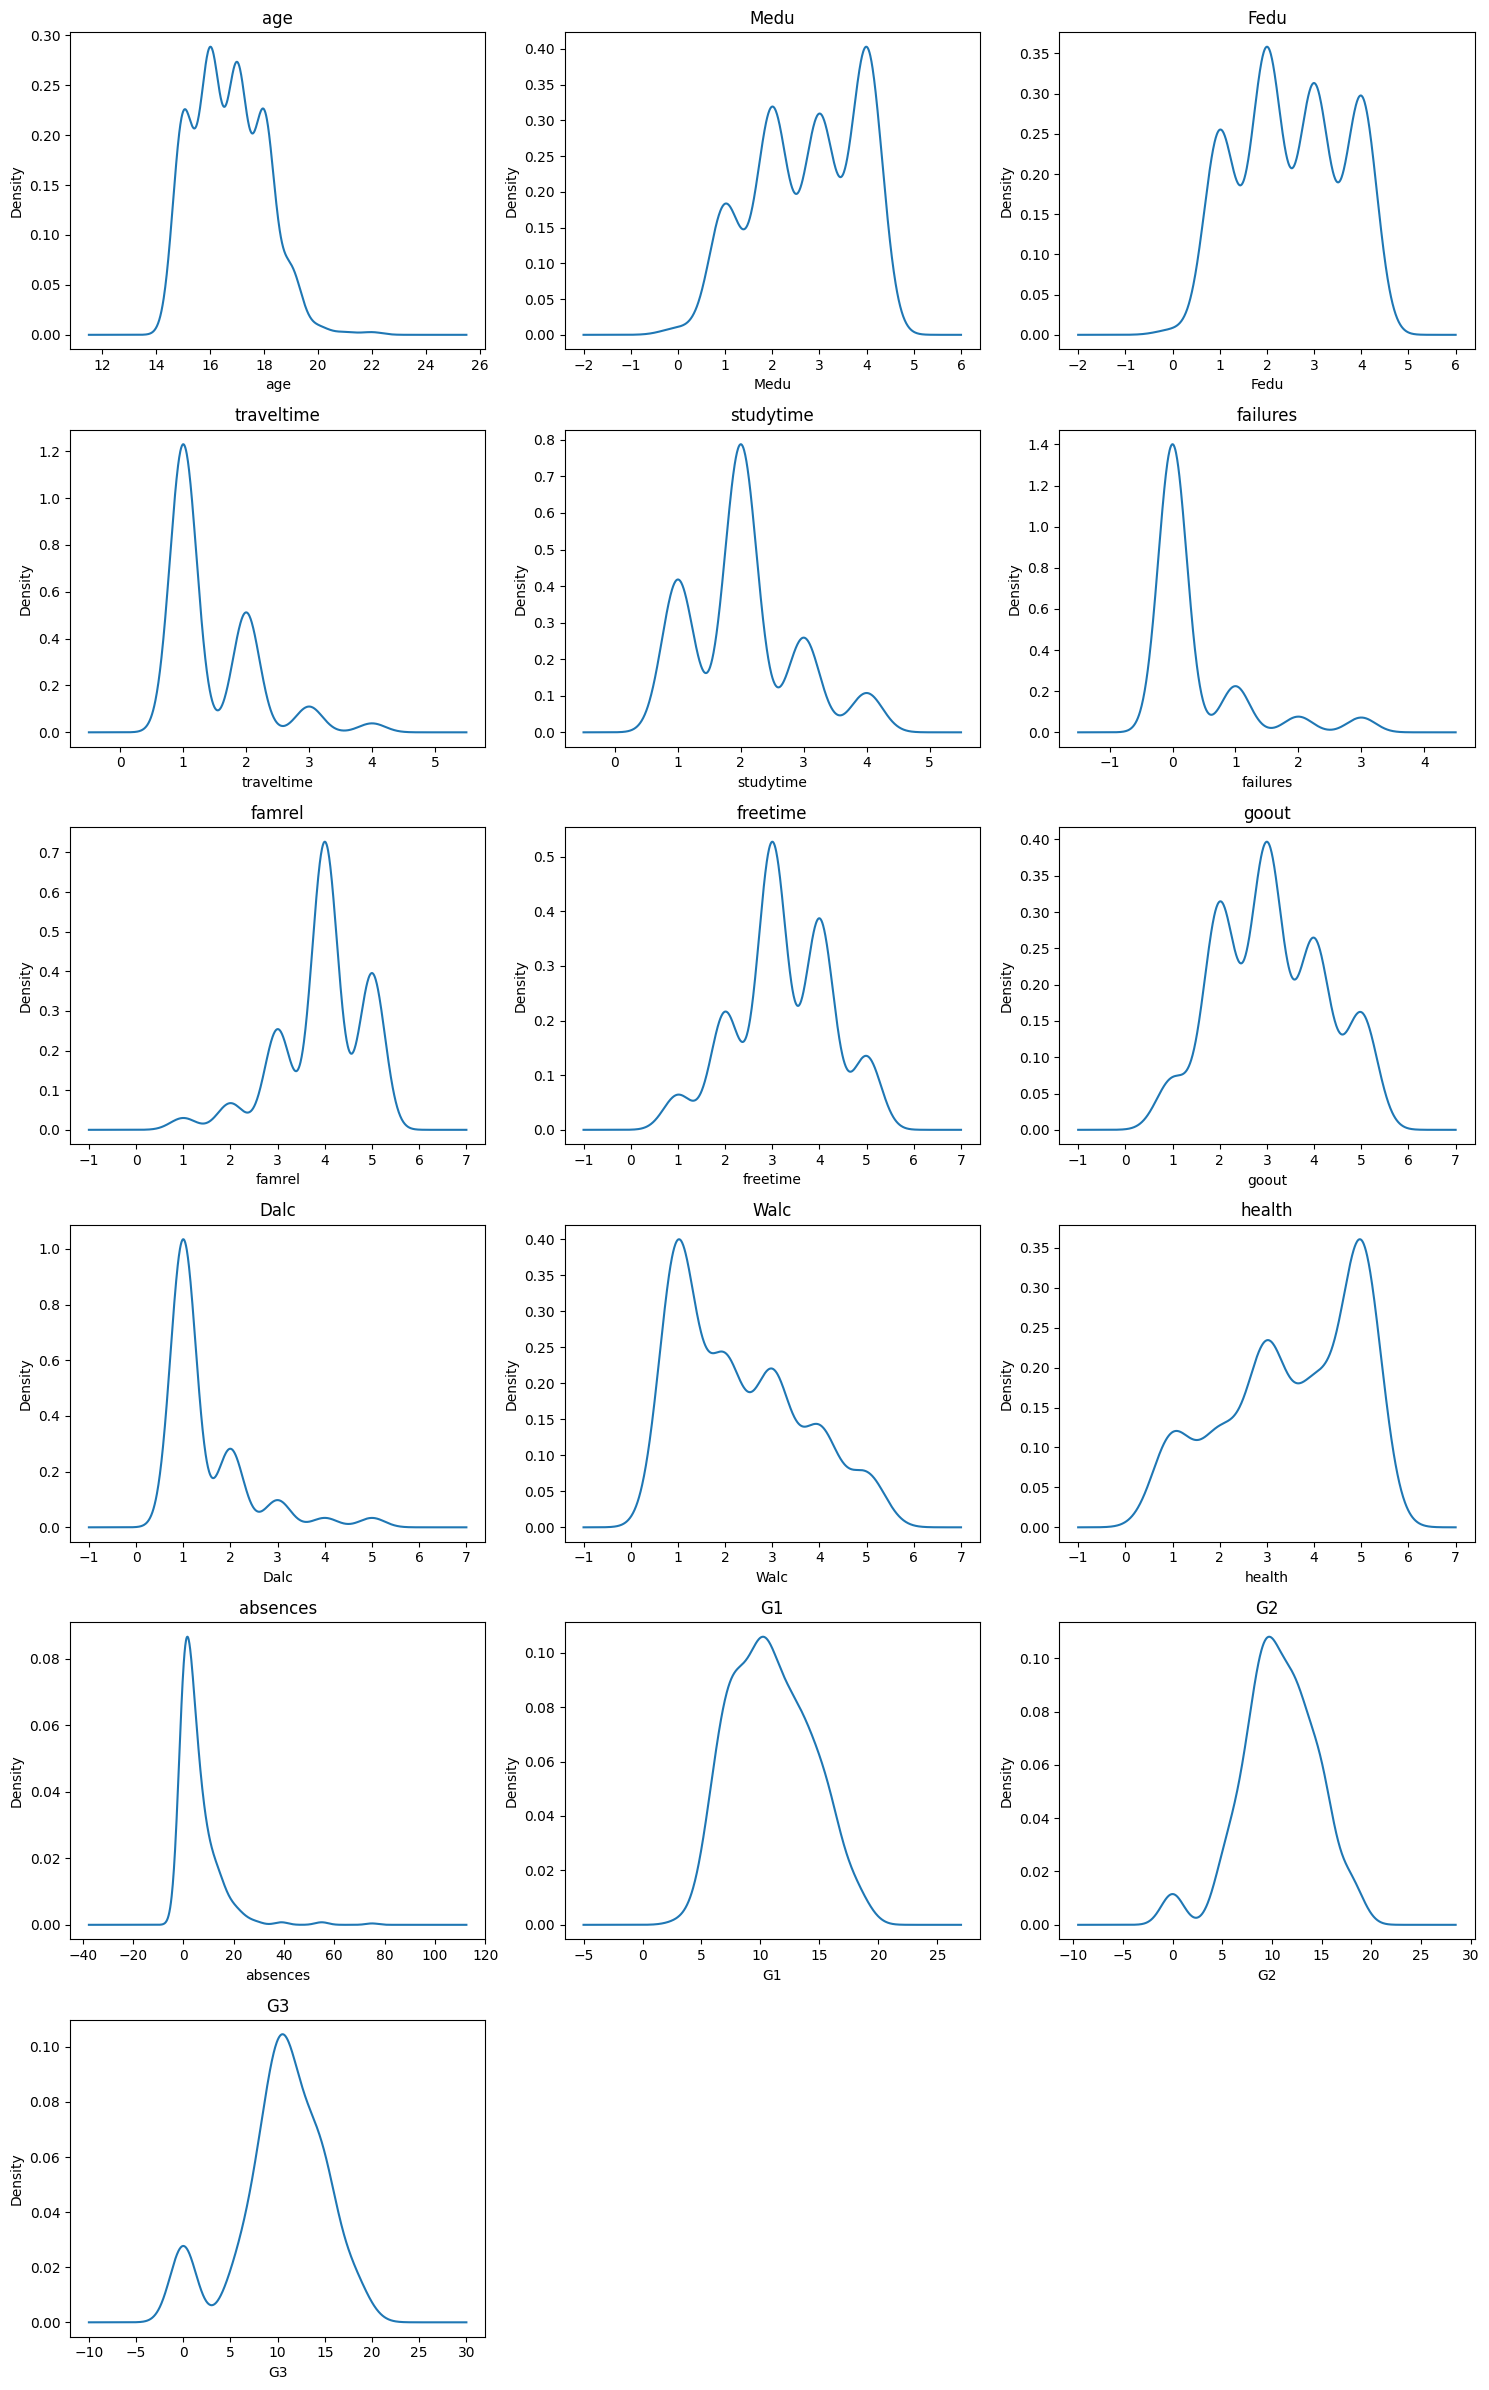

In [11]:
# Histogram plot




# Calculate the number of rows and columns for subplots
num_cols = len(numerical_columns)
num_cols_per_row = 3  # Number of columns per row
num_rows = (num_cols + num_cols_per_row - 1) // num_cols_per_row

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols_per_row, figsize=(15, num_rows * 4))

for i, col in enumerate(numerical_columns):
    row = i // num_cols_per_row
    col_num = i % num_cols_per_row
    data[col].plot.kde(ax=axes[row, col_num])
    axes[row, col_num].set_title(f'{col}')
    axes[row, col_num].set_xlabel(col)
    axes[row, col_num].set_ylabel('Density')

# Hide any empty subplots
for i in range(num_cols, num_rows * num_cols_per_row):
    row = i // num_cols_per_row
    col_num = i % num_cols_per_row
    fig.delaxes(axes[row, col_num])

plt.tight_layout()
plt.show()

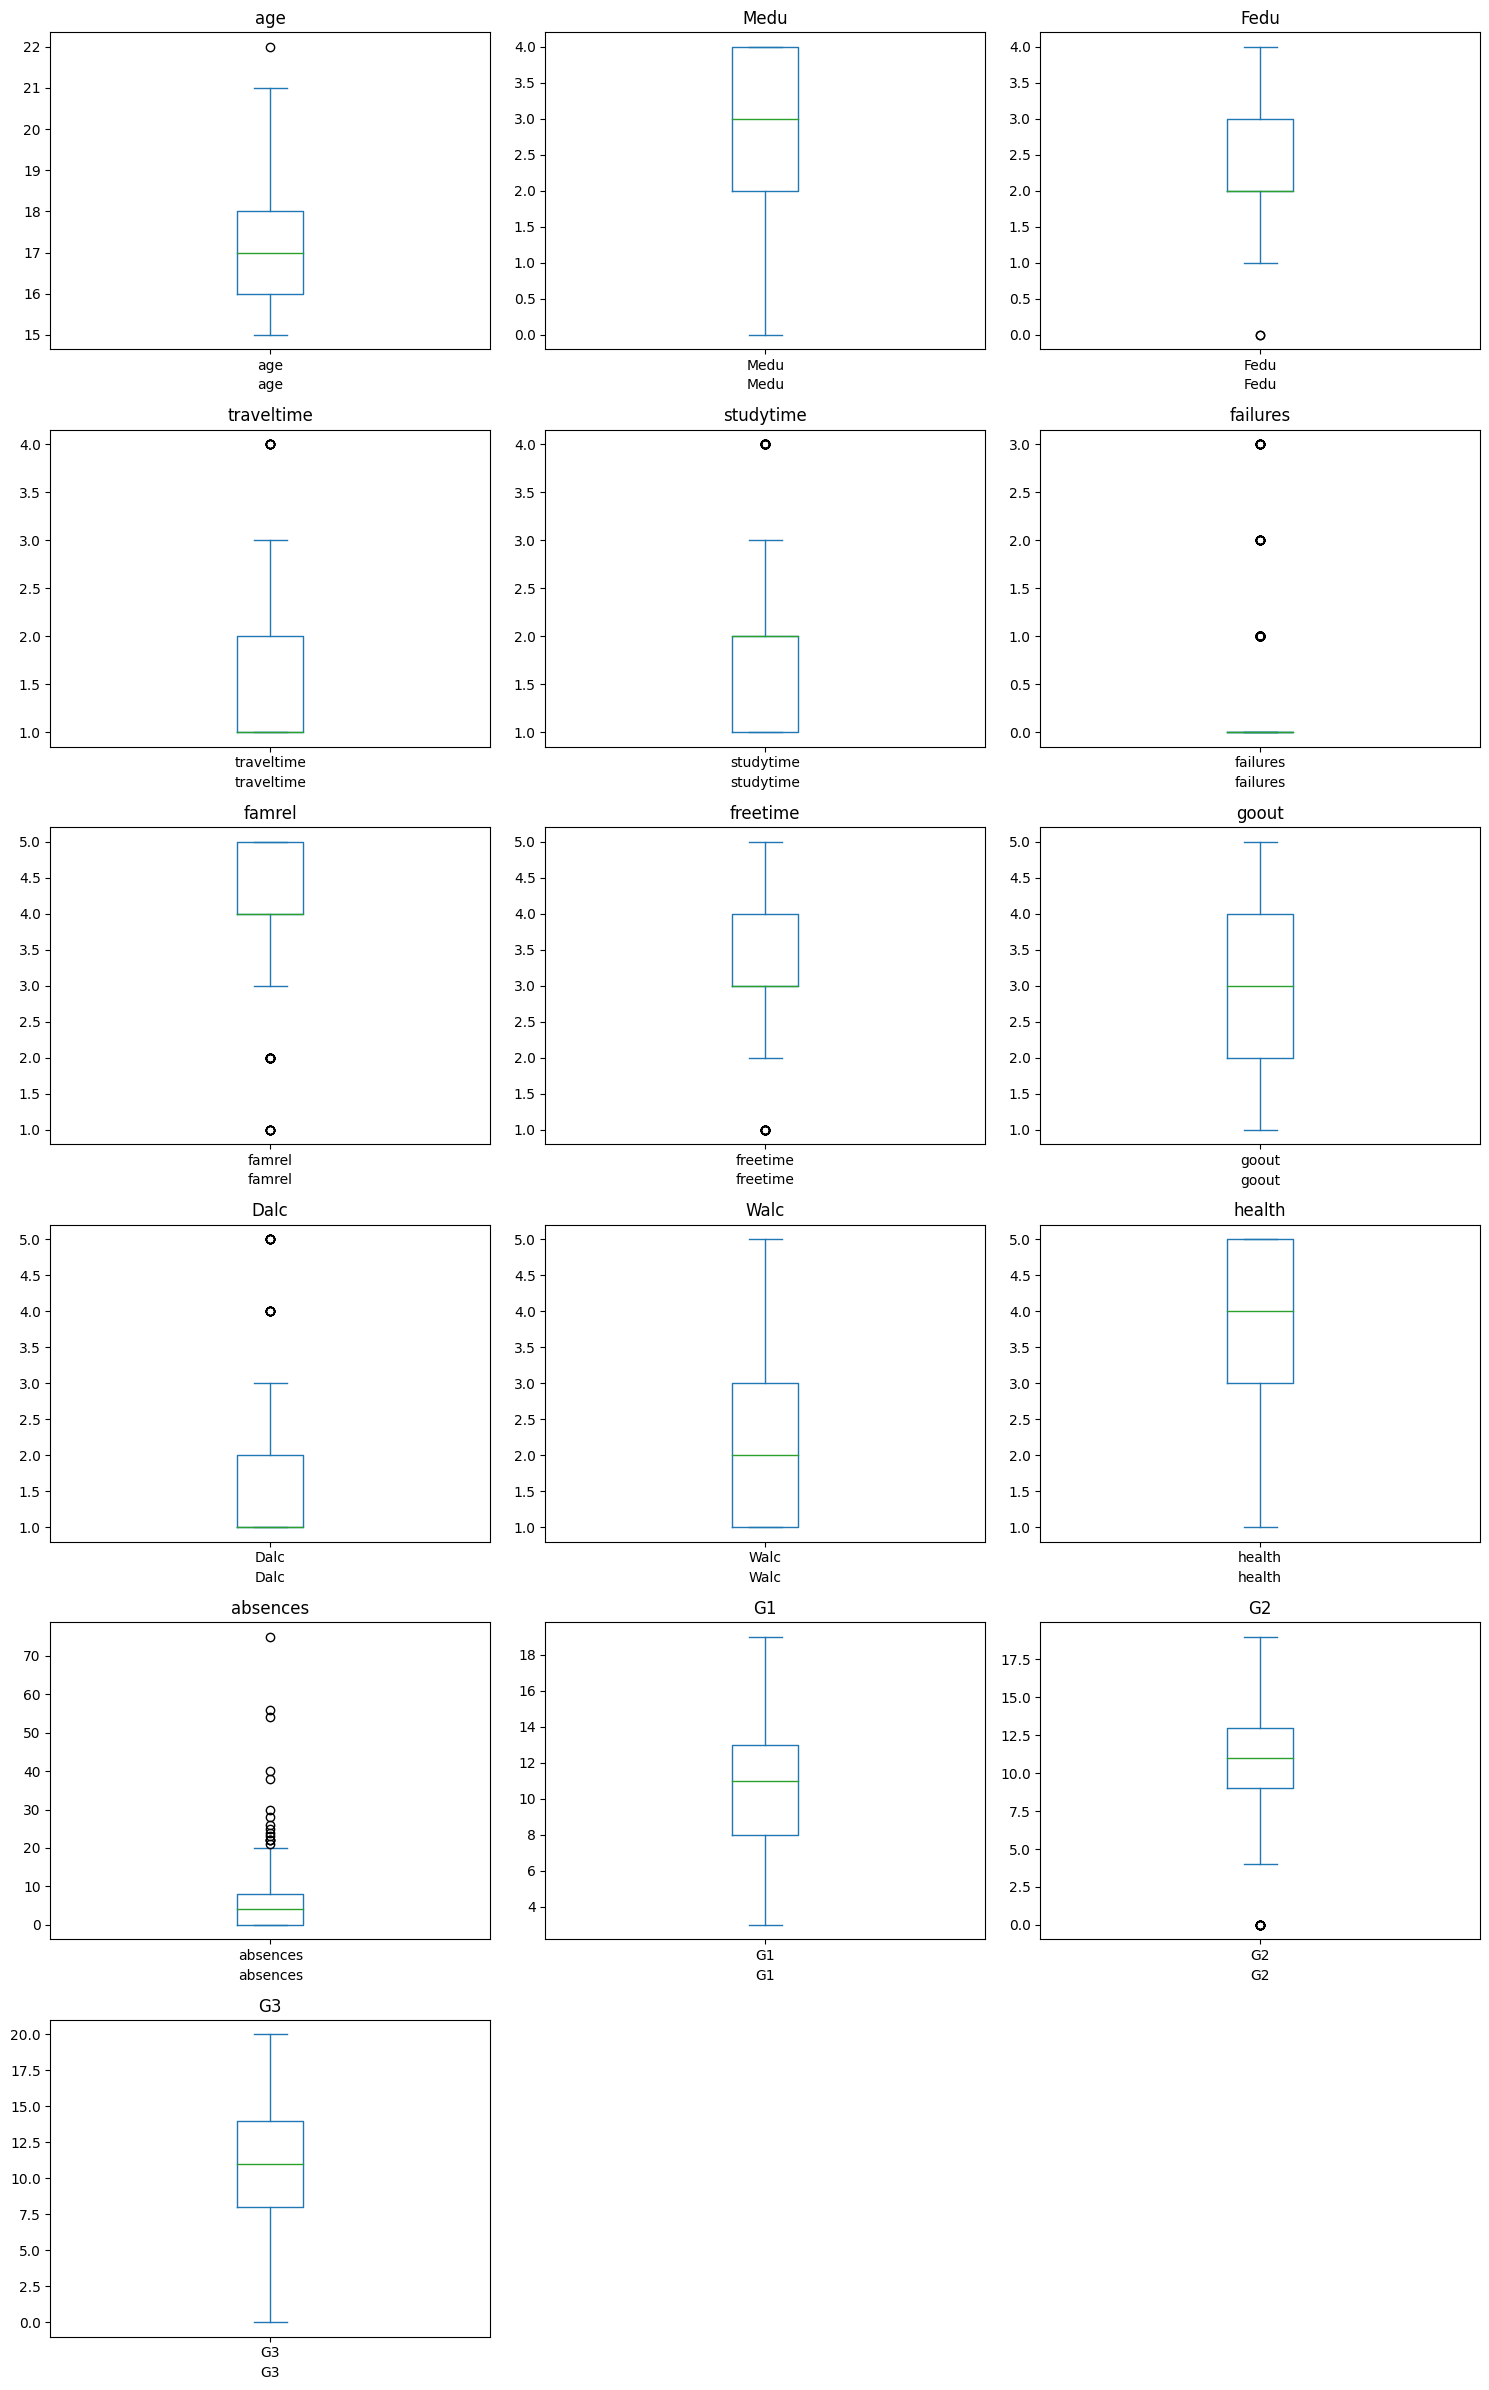

In [12]:
# Box plot


# Calculate the number of rows and columns for subplots
num_cols = len(numerical_columns)
num_cols_per_row = 3  # Number of columns per row
num_rows = (num_cols + num_cols_per_row - 1) // num_cols_per_row

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols_per_row, figsize=(15, num_rows * 4))

for i, col in enumerate(numerical_columns):
    row = i // num_cols_per_row
    col_num = i % num_cols_per_row
    data[col].plot.box(ax=axes[row, col_num])
    axes[row, col_num].set_title(f'{col}')
    axes[row, col_num].set_xlabel(col)

# Hide any empty subplots
for i in range(num_cols, num_rows * num_cols_per_row):
    row = i // num_cols_per_row
    col_num = i % num_cols_per_row
    fig.delaxes(axes[row, col_num])

plt.tight_layout()
plt.show()

### Data pre-processing ###

In [13]:
# Select categorical variables
cat_columns = data.select_dtypes(['category']).columns

# Iterate over all categorical variables
for c in cat_columns:
  # Print the categorical variables name
  print(c)
  # Print the categories
  print(dict(enumerate(data[c].cat.categories)))
  print()

# Label encoding
dataset_label_encoding = data[cat_columns].apply(lambda x: x.cat.codes)
dataset_label_encoding = dataset_label_encoding.join(data.loc[:, ~data.columns.isin(cat_columns)])

# Print label encoded dataset
print(dataset_label_encoding)

print()

school
{0: 'GP', 1: 'MS'}

sex
{0: 'F', 1: 'M'}

address
{0: 'R', 1: 'U'}

famsize
{0: 'GT3', 1: 'LE3'}

Pstatus
{0: 'A', 1: 'T'}

Mjob
{0: 'at_home', 1: 'health', 2: 'other', 3: 'services', 4: 'teacher'}

Fjob
{0: 'at_home', 1: 'health', 2: 'other', 3: 'services', 4: 'teacher'}

reason
{0: 'course', 1: 'home', 2: 'other', 3: 'reputation'}

guardian
{0: 'father', 1: 'mother', 2: 'other'}

schoolsup
{0: 'no', 1: 'yes'}

famsup
{0: 'no', 1: 'yes'}

paid
{0: 'no', 1: 'yes'}

activities
{0: 'no', 1: 'yes'}

nursery
{0: 'no', 1: 'yes'}

higher
{0: 'no', 1: 'yes'}

internet
{0: 'no', 1: 'yes'}

romantic
{0: 'no', 1: 'yes'}

     school  sex  address  famsize  Pstatus  Mjob  Fjob  reason  guardian  \
0         0    0        1        0        0     0     4       0         1   
1         0    0        1        0        1     0     2       0         0   
2         0    0        1        1        1     0     2       2         1   
3         0    0        1        0        1     1     3       1   

In [14]:
# One-Hot encoding
dataset_one_hot_encoded = get_dummies(data, dtype=int)

# Print one-hot encoded dataset
print(dataset_one_hot_encoded)

print()

     age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  \
0     18     4     4           2          2         0       4         3   
1     17     1     1           1          2         0       5         3   
2     15     1     1           1          2         3       4         3   
3     15     4     2           1          3         0       3         2   
4     16     3     3           1          2         0       4         3   
..   ...   ...   ...         ...        ...       ...     ...       ...   
390   20     2     2           1          2         2       5         5   
391   17     3     1           2          1         0       2         4   
392   21     1     1           1          1         3       5         5   
393   18     3     2           3          1         0       4         4   
394   19     1     1           1          1         0       3         2   

     goout  Dalc  ...  activities_no  activities_yes  nursery_no  nursery_yes  \
0        4     1  

In [15]:
# Create the scaler
scaler = MinMaxScaler()

# Normalize the dataset
normalized_dataset = DataFrame(scaler.fit_transform(dataset_one_hot_encoded), columns=dataset_one_hot_encoded.columns, index=dataset_one_hot_encoded.index)

# Print normalized dataset
print(normalized_dataset)

print()

          age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  \
0    0.428571  1.00  1.00    0.333333   0.333333  0.000000    0.75      0.50   
1    0.285714  0.25  0.25    0.000000   0.333333  0.000000    1.00      0.50   
2    0.000000  0.25  0.25    0.000000   0.333333  1.000000    0.75      0.50   
3    0.000000  1.00  0.50    0.000000   0.666667  0.000000    0.50      0.25   
4    0.142857  0.75  0.75    0.000000   0.333333  0.000000    0.75      0.50   
..        ...   ...   ...         ...        ...       ...     ...       ...   
390  0.714286  0.50  0.50    0.000000   0.333333  0.666667    1.00      1.00   
391  0.285714  0.75  0.25    0.333333   0.000000  0.000000    0.25      0.75   
392  0.857143  0.25  0.25    0.000000   0.000000  1.000000    1.00      1.00   
393  0.428571  0.75  0.50    0.666667   0.000000  0.000000    0.75      0.75   
394  0.571429  0.25  0.25    0.000000   0.000000  0.000000    0.50      0.25   

     goout  Dalc  ...  activities_no  a

In [16]:
%%time

# Functions that shows different rows in two dataframes
def get_different_rows(source_df, new_df):
    """Returns just the rows from the new dataframe that differ from the source dataframe"""
    merged_df = source_df.merge(new_df, indicator=True, how='outer')
    changed_rows_df = merged_df[merged_df['_merge'] == 'right_only']
    return changed_rows_df.drop('_merge', axis=1)

# De-Normalize the dataset
denormalized_dataset = DataFrame(scaler.inverse_transform(normalized_dataset), columns=normalized_dataset.columns, index=normalized_dataset.index)

# Print denormalized dataset
print(denormalized_dataset)

# Print equality test
print(f'Is the original dataframe equals to the denormalized dataframe? {dataset_one_hot_encoded.equals(denormalized_dataset)}')

# Show differences
print(get_different_rows(dataset_one_hot_encoded, denormalized_dataset))

print()

      age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  \
0    18.0   4.0   4.0         2.0        2.0       0.0     4.0       3.0   
1    17.0   1.0   1.0         1.0        2.0       0.0     5.0       3.0   
2    15.0   1.0   1.0         1.0        2.0       3.0     4.0       3.0   
3    15.0   4.0   2.0         1.0        3.0       0.0     3.0       2.0   
4    16.0   3.0   3.0         1.0        2.0       0.0     4.0       3.0   
..    ...   ...   ...         ...        ...       ...     ...       ...   
390  20.0   2.0   2.0         1.0        2.0       2.0     5.0       5.0   
391  17.0   3.0   1.0         2.0        1.0       0.0     2.0       4.0   
392  21.0   1.0   1.0         1.0        1.0       3.0     5.0       5.0   
393  18.0   3.0   2.0         3.0        1.0       0.0     4.0       4.0   
394  19.0   1.0   1.0         1.0        1.0       0.0     3.0       2.0   

     goout  Dalc  ...  activities_no  activities_yes  nursery_no  nursery_yes  \
0     

<timed exec>:4: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.


### Save cleaned dataset ###

In [17]:
denormalized_dataset.to_csv('/kaggle/working/dataset_cleaned.csv', sep=';', decimal='.', index=False)

## Artificial Intelligence (AI) ##

### Machine Learning (ML) ###

#### Model ####

In [18]:
# Read a dataset
dataset = read_csv('/kaggle/working/dataset_cleaned.csv', sep=';', decimal='.')

# Print dataset information
print(dataset.info())
#print(dataset)

print()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 59 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                395 non-null    float64
 1   Medu               395 non-null    float64
 2   Fedu               395 non-null    float64
 3   traveltime         395 non-null    float64
 4   studytime          395 non-null    float64
 5   failures           395 non-null    float64
 6   famrel             395 non-null    float64
 7   freetime           395 non-null    float64
 8   goout              395 non-null    float64
 9   Dalc               395 non-null    float64
 10  Walc               395 non-null    float64
 11  health             395 non-null    float64
 12  absences           395 non-null    float64
 13  G1                 395 non-null    float64
 14  G2                 395 non-null    float64
 15  G3                 395 non-null    float64
 16  school_GP          395 non

In [19]:
# Split between features and target
dataset_features = dataset[[c for c in dataset.columns]]
#dataset_target_classification = dataset.target

# Convert string target into numeric target
#categories = dict(enumerate(dataset_target_classification.cat.categories))
#dataset_target_classification = dataset_target_classification.cat.codes
#print('Categories')
#print(categories)
#print()

# Print splitted datasets
print('Features:')
print(dataset_features.info())
#print(dataset_features)
#print()
##print('Target (classification):')
#print(dataset_target_classification.info())
#print(dataset_target_classification)
print()

Features:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 59 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                395 non-null    float64
 1   Medu               395 non-null    float64
 2   Fedu               395 non-null    float64
 3   traveltime         395 non-null    float64
 4   studytime          395 non-null    float64
 5   failures           395 non-null    float64
 6   famrel             395 non-null    float64
 7   freetime           395 non-null    float64
 8   goout              395 non-null    float64
 9   Dalc               395 non-null    float64
 10  Walc               395 non-null    float64
 11  health             395 non-null    float64
 12  absences           395 non-null    float64
 13  G1                 395 non-null    float64
 14  G2                 395 non-null    float64
 15  G3                 395 non-null    float64
 16  school_GP       

#### Evaluation ####

#### Hyperparametrization ####

### Deep Learning (DL) ###

#### Model ####

#### Evaluation ####

#### Hyperparametrization ####

### Comparison between ML - DL ###